<a href="https://colab.research.google.com/github/Pperezhogin/pyqg_generative/blob/master/Google-Colab/copy-online-simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Needed only on Google Colab
try:
    import google.colab
    !pip install aiohttp requests zarr pyfftw gcm_filters pyqg cmocean gplearn
    !pip install git+https://github.com/m2lines/pyqg_generative.git
    !pip install git+https://github.com/m2lines/pyqg_parameterization_benchmarks.git
    !git clone https://github.com/m2lines/pyqg_generative.git
    !cp -r pyqg_generative/Google-Colab/GAN .
    !cp -r pyqg_generative/Google-Colab/VAE .
    !cp -r pyqg_generative/Google-Colab/GZ .
    print('\n------------- Packages on Google Colab are installed ------------')
except:
    print('\n------------- Not running on Google Colab --------------')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.1/223.1 KB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyqg: filename=pyqg-0.7.2-cp38-cp38-linux_x86_64.whl size=933190 sha256=8c4ce46e4372298f7708e6d8f9cce180bcb3ffd069f331ef5f2eb6716daddbb4
  Stored in directory: /root/.cache/pip/wheels/a2/e3/ed/02db1e393bf087cc9729ef23e34080ea15cdc6322dbc0aace7
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-no

In [2]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
def open_zarr(folder):
    for url, label in zip(['https://g-402b19.00888.8540.data.globus.org', 'https://storage.googleapis.com/m2lines-public-persistent/perezhogin-generative-zarr'], ['NYU', 'Google Cloud']):
      try:
        mapper = fsspec.get_mapper(f'{url}/{folder}.zarr')
        return xr.open_zarr(mapper, consolidated=True, decode_times=False)
      except:
        print(f'{folder} on {label} failed')

In [7]:
import json
def read_model(folder):
  with open(f'{folder}/model_args.json') as file:
    model_args = json.load(file)
    return eval(model_args.pop('model'))(folder=folder, **model_args)

# Read reference simulations

In [44]:
reference = open_zarr('eddy/48/hires-sharp').load()
lores = open_zarr('eddy/48/lores').load()

# Open pretrained parameterizations

In [21]:
from pyqg_generative.models.cgan_regression import CGANRegression
from pyqg_generative.models.cvae_regression import CVAERegression
from pyqg_generative.models.mean_var_model import MeanVarModel

In [22]:
gan_model = read_model('GAN')
vae_model = read_model('VAE')
gz_model = read_model('GZ')

reading CGANRegression G, D from GAN
reading CVAERegression from VAE
reading MeanVarModel mean from GZ
reading MeanVarModel var from GZ


# Online simulation of parameterized model

In [64]:
from pyqg_generative.tools.simulate import run_simulation
from pyqg_generative.tools.parameters import EDDY_PARAMS, YEAR
from pyqg_generative.tools.operators import ave_lev
params = EDDY_PARAMS.nx(48)._update({'tmax': 20*YEAR, 'dt': 7200}) # adjust resolution and integration time
def run_online(model):
  parameterization = dict(self=model, sampling='AR1', nsteps=1) # White noise in time sampling
  ds = run_simulation(params, parameterization)
  return ds

In [65]:
gan = run_online(gan_model)

INFO:  Logger initialized
INFO: Step: 1000, Time: 7.20e+06, KE: 1.38e-07, CFL: 0.009
INFO: Step: 2000, Time: 1.44e+07, KE: 2.75e-07, CFL: 0.009
INFO: Step: 3000, Time: 2.16e+07, KE: 6.57e-07, CFL: 0.009
INFO: Step: 4000, Time: 2.88e+07, KE: 1.74e-06, CFL: 0.009
INFO: Step: 5000, Time: 3.60e+07, KE: 4.86e-06, CFL: 0.009
INFO: Step: 6000, Time: 4.32e+07, KE: 1.39e-05, CFL: 0.009
INFO: Step: 7000, Time: 5.04e+07, KE: 4.02e-05, CFL: 0.015
INFO: Step: 8000, Time: 5.76e+07, KE: 1.17e-04, CFL: 0.026
INFO: Step: 9000, Time: 6.48e+07, KE: 3.26e-04, CFL: 0.053
INFO: Step: 10000, Time: 7.20e+07, KE: 4.38e-04, CFL: 0.052
INFO: Step: 11000, Time: 7.92e+07, KE: 5.48e-04, CFL: 0.096
INFO: Step: 12000, Time: 8.64e+07, KE: 5.50e-04, CFL: 0.063
INFO: Step: 13000, Time: 9.36e+07, KE: 5.90e-04, CFL: 0.069
INFO: Step: 14000, Time: 1.01e+08, KE: 5.65e-04, CFL: 0.083
INFO: Step: 15000, Time: 1.08e+08, KE: 5.82e-04, CFL: 0.068
INFO: Step: 16000, Time: 1.15e+08, KE: 5.63e-04, CFL: 0.078
INFO: Step: 17000, Time

Function 'concat_in_time' executed in 0.7818s
Function 'run_simulation' executed in 431.5238s


In [66]:
vae = run_online(vae_model)

INFO:  Logger initialized
INFO: Step: 1000, Time: 7.20e+06, KE: 4.06e-07, CFL: 0.009
INFO: Step: 2000, Time: 1.44e+07, KE: 8.96e-07, CFL: 0.009
INFO: Step: 3000, Time: 2.16e+07, KE: 2.18e-06, CFL: 0.009
INFO: Step: 4000, Time: 2.88e+07, KE: 5.67e-06, CFL: 0.009
INFO: Step: 5000, Time: 3.60e+07, KE: 1.55e-05, CFL: 0.009
INFO: Step: 6000, Time: 4.32e+07, KE: 4.36e-05, CFL: 0.014
INFO: Step: 7000, Time: 5.04e+07, KE: 1.26e-04, CFL: 0.027
INFO: Step: 8000, Time: 5.76e+07, KE: 3.59e-04, CFL: 0.051
INFO: Step: 9000, Time: 6.48e+07, KE: 4.67e-04, CFL: 0.066
INFO: Step: 10000, Time: 7.20e+07, KE: 5.02e-04, CFL: 0.081
INFO: Step: 11000, Time: 7.92e+07, KE: 5.46e-04, CFL: 0.075
INFO: Step: 12000, Time: 8.64e+07, KE: 5.49e-04, CFL: 0.068
INFO: Step: 13000, Time: 9.36e+07, KE: 5.79e-04, CFL: 0.077
INFO: Step: 14000, Time: 1.01e+08, KE: 5.91e-04, CFL: 0.069
INFO: Step: 15000, Time: 1.08e+08, KE: 5.87e-04, CFL: 0.069
INFO: Step: 16000, Time: 1.15e+08, KE: 6.11e-04, CFL: 0.068
INFO: Step: 17000, Time

Function 'concat_in_time' executed in 0.5776s
Function 'run_simulation' executed in 425.0879s


In [67]:
gz = run_online(gz_model)

INFO:  Logger initialized
INFO: Step: 1000, Time: 7.20e+06, KE: 5.67e-07, CFL: 0.009
INFO: Step: 2000, Time: 1.44e+07, KE: 1.44e-06, CFL: 0.010
INFO: Step: 3000, Time: 2.16e+07, KE: 4.50e-06, CFL: 0.013
INFO: Step: 4000, Time: 2.88e+07, KE: 1.29e-05, CFL: 0.016
INFO: Step: 5000, Time: 3.60e+07, KE: 3.19e-05, CFL: 0.020
INFO: Step: 6000, Time: 4.32e+07, KE: 7.88e-05, CFL: 0.025
INFO: Step: 7000, Time: 5.04e+07, KE: 1.50e-04, CFL: 0.045
INFO: Step: 8000, Time: 5.76e+07, KE: 2.06e-04, CFL: 0.052
INFO: Step: 9000, Time: 6.48e+07, KE: 2.75e-04, CFL: 0.052
INFO: Step: 10000, Time: 7.20e+07, KE: 3.56e-04, CFL: 0.064
INFO: Step: 11000, Time: 7.92e+07, KE: 4.25e-04, CFL: 0.068
INFO: Step: 12000, Time: 8.64e+07, KE: 5.27e-04, CFL: 0.069
INFO: Step: 13000, Time: 9.36e+07, KE: 5.44e-04, CFL: 0.071
INFO: Step: 14000, Time: 1.01e+08, KE: 5.97e-04, CFL: 0.078
INFO: Step: 15000, Time: 1.08e+08, KE: 6.02e-04, CFL: 0.074
INFO: Step: 16000, Time: 1.15e+08, KE: 6.02e-04, CFL: 0.071
INFO: Step: 17000, Time

Function 'concat_in_time' executed in 0.5507s
Function 'run_simulation' executed in 747.5344s


# Plotting Kinetic energy

In [68]:
def KE(ds):
  if 'run' in ds.dims:
    dims = ['x', 'y', 'run']
  else:
    dims = ['x', 'y']
  return (ave_lev(0.5 * (ds.u**2 + ds.v**2), delta=0.25)).mean(dims)

In [69]:
from pyqg_generative.tools.plot_helpers import *
default_rcParams({'axes.titlelocation': 'center', 'font.size': 16})

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


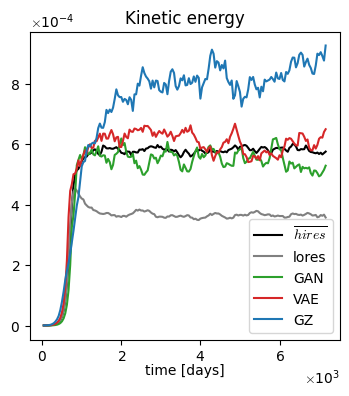

In [70]:
KE(reference).plot(label='$\overline{hires}$', color='k')
KE(lores).plot(label='lores', color='gray')
KE(gan).plot(label='GAN', color='tab:green')
KE(vae).plot(label='VAE', color='tab:red')
KE(gz).plot(label='GZ', color='tab:blue')
plt.title('Kinetic energy')
plt.legend()

# Snapshots

In [71]:
def sel(ds):
  try:
    return ds.isel(run=0, time=-1, lev=0)
  except:
    return ds.isel(time=-1, lev=0)

In [72]:
def plot_velocity(ds):
  imshow(np.sqrt(sel(ds.u)**2+sel(ds.v)**2), vmax=1.3e-1, cmap='inferno', cbar_label='Velocity modulus, $m/s$')

Text(0.5, 0.98, 'Sharp filter, 48x48, time step 2 hours')

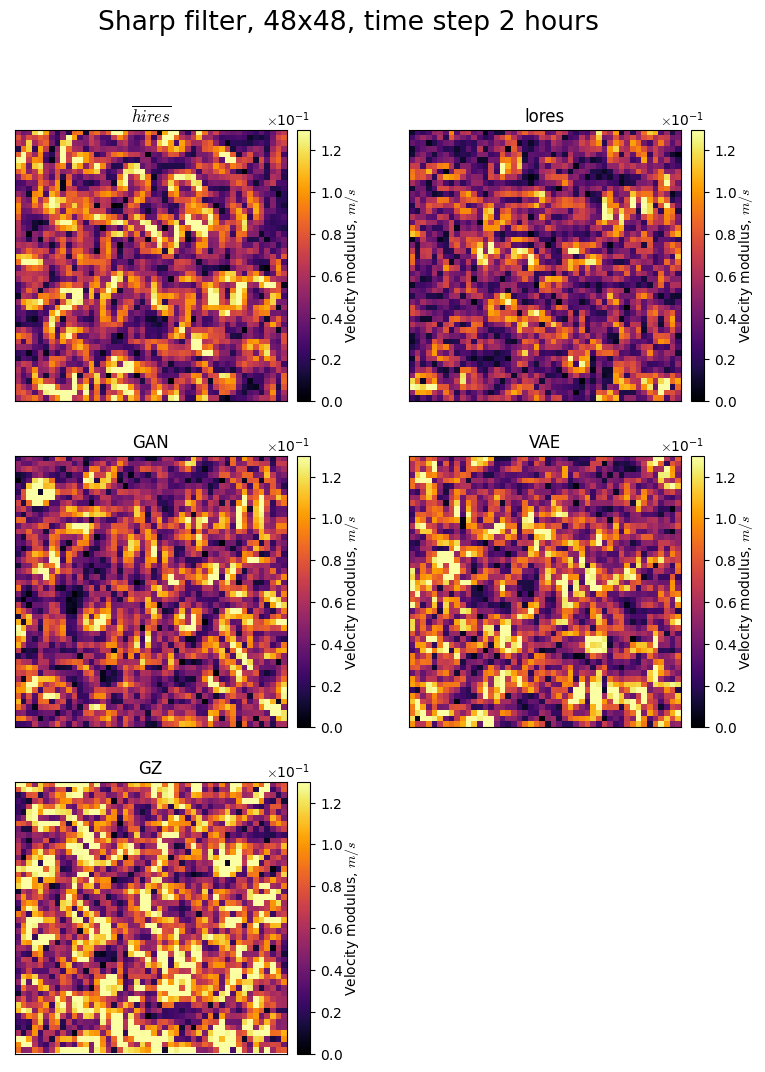

In [73]:
plt.figure(figsize=(9,12))
model = [reference, lores, gan, vae, gz]
label = ['$\overline{hires}$', 'lores', 'GAN', 'VAE', 'GZ']
for j in range(5):
  plt.subplot(3,2,j+1)
  plot_velocity(model[j])
  plt.title(label[j])
plt.suptitle('Sharp filter, 48x48, time step 2 hours')

# KE spectrum

In [74]:
from pyqg_generative.tools.spectral_tools import spectrum, calc_ispec
from pyqg_generative.tools.operators import coord
import pyqg

In [75]:
def KE_spectrum(ds):
  m = pyqg.QGModel(nx=len(ds.x), log_level=0)
  if 'run' in ds.dims:
    _ds = ds.mean('run')
  else:
    _ds = ds
  k, sp = calc_ispec(m, 0.5*ave_lev(_ds.KEspec, delta=0.25))
  return xr.DataArray(sp, dims=['kr'],
                coords=[coord(k, 'wavenumber, $m^{-1}$')])

(0.05, 20)

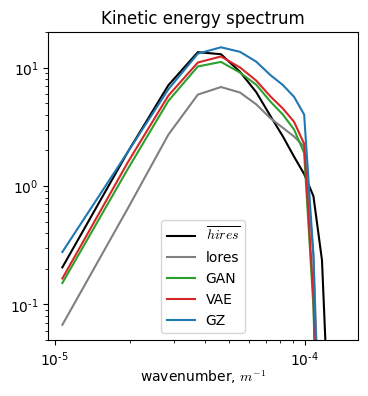

In [76]:
KE_spectrum(reference).plot(label='$\overline{hires}$', color='k')
KE_spectrum(lores).plot(label='lores', color='gray')
KE_spectrum(gan).plot(label='GAN', color='tab:green')
KE_spectrum(vae).plot(label='VAE', color='tab:red')
KE_spectrum(gz).plot(label='GZ', color='tab:blue')
plt.title('Kinetic energy spectrum')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim([5e-2, 20])

# Online metrics. Distributional and spectral errors

In [77]:
from pyqg_generative.tools.comparison_tools import diagnostic_differences_Perezhogin, distrib_score, spectral_score

In [78]:
def compute_metrics(model):
  d = diagnostic_differences_Perezhogin(model, reference.isel(run=0))[0]
  print('Distributional error', distrib_score(d))
  print('Spectral error', spectral_score(d))


In [79]:
compute_metrics(gan)

Distributional error 0.03483027178018462
Spectral error 0.22129903221577354


In [80]:
compute_metrics(vae)

Distributional error 0.04144719274852606
Spectral error 0.21444646848027046


In [81]:
compute_metrics(gz)

Distributional error 0.20885271399081487
Spectral error 0.4818579043905941


In [82]:
compute_metrics(lores.isel(run=0))

Distributional error 0.1888102207415551
Spectral error 0.5053847264088392
